In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['products.csv', 'departments.csv', 'sample_submission.csv', 'order_products__prior.csv', 'order_products__train.csv', 'aisles.csv', 'orders.csv']


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

color = sns.color_palette()
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'font.size': 18})

In [165]:
##changing directory
os.chdir('../input/')

In [166]:
###  INVENTORY TERMS

#### AISLES
all_aisles = pd.read_csv('aisles.csv') #134
all_aisles.head(5)
all_aisles.describe(include = 'all')

,aisle_id,aisle
count,134.00,134
unique,nan,134
top,nan,refrigerated
freq,nan,1
mean,67.50,NaN
std,38.83,NaN
min,1.00,NaN
25%,34.25,NaN
50%,67.50,NaN
75%,100.75,NaN


In [167]:
###  INVENTORY TERMS

#### DEPARTMENTS
all_depts = pd.read_csv('departments.csv') #21
all_depts.head(5)
all_depts.describe(include = 'all')

,department_id,department
count,21.00,21
unique,nan,21
top,nan,alcohol
freq,nan,1
mean,11.00,NaN
std,6.20,NaN
min,1.00,NaN
25%,6.00,NaN
50%,11.00,NaN
75%,16.00,NaN


In [168]:
###  INVENTORY TERMS

#### PRODUCTS
all_products = pd.read_csv('products.csv') #49688
all_products.head(5)
all_products.describe(include = 'all')
##134 aisle_ids, 21 dept_ids, 49688 products, ids - All descriptions are unique

,product_id,product_name,aisle_id,department_id
count,"49,688.00",49688,"49,688.00","49,688.00"
unique,nan,49688,nan,nan
top,nan,Original Infant Formula with Iron,nan,nan
freq,nan,1,nan,nan
mean,"24,844.50",NaN,67.77,11.73
std,"14,343.83",NaN,38.32,5.85
min,1.00,NaN,1.00,1.00
25%,"12,422.75",NaN,35.00,7.00
50%,"24,844.50",NaN,69.00,13.00
75%,"37,266.25",NaN,100.00,17.00


In [169]:
###  ORDER TERMS
all_orders = pd.read_csv('orders.csv')
print(all_orders.shape) # (3421083, 7)
all_orders.head(5)

print("No. of first orders : ", all_orders.days_since_prior_order.isnull().sum())
print("No. of users : ",all_orders.user_id.nunique())
#Orders of all users from their first purchase is given, max ? - dig down to details on eda of orders

all_orders.describe()

(3421083, 7)
No. of first orders :  206209
No. of users :  206209


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,"3,421,083.00","3,421,083.00","3,421,083.00","3,421,083.00","3,421,083.00","3,214,874.00"
mean,"1,710,542.00","102,978.21",17.15,2.78,13.45,11.11
std,"987,581.74","59,533.72",17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,"855,271.50","51,394.00",5.00,1.00,10.00,4.00
50%,"1,710,542.00","102,689.00",11.00,3.00,13.00,7.00
75%,"2,565,812.50","154,385.00",23.00,5.00,16.00,15.00
max,"3,421,083.00","206,209.00",100.00,6.00,23.00,30.00


In [170]:
### PRIOR ORDERS
prior_orders = pd.read_csv('order_products__prior.csv')
print(prior_orders.shape)
prior_orders.head(5)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [171]:
### TRAINING ORDERS
train_set = pd.read_csv('order_products__train.csv')
print(train_set.shape)
train_set.head(5)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [172]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


## EDA

### ORDERS DATASET PARTITIONS

In [173]:
all_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


In [174]:
all_orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [175]:
all_orders[['user_id','eval_set']].groupby('eval_set').nunique('user_id')['user_id']

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [176]:
set(all_orders.loc[all_orders['eval_set'] == 'train','user_id']) & set(all_orders.loc[all_orders['eval_set'] == 'test','user_id'])

set()

Prior orders have multiple orders against each user. Test and train orders have discrete orders of discrete users. Feature generation can be made from prior orders data.

### ORDERS PER CUSTOMER

In [177]:
t = all_orders[['user_id','order_id']].groupby('user_id').nunique('order_id')['order_id']
print(t.max())
print(t.min())

100
4


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


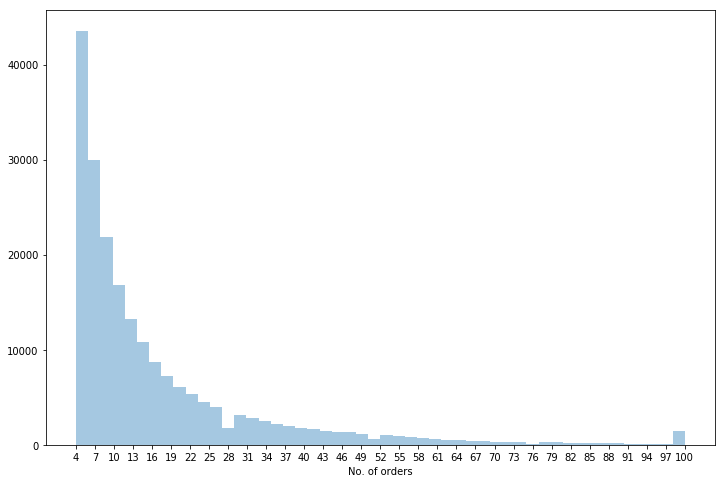

In [178]:
plt.figure(figsize=(12,8))
sns.distplot(t,norm_hist=False,kde=False,axlabel='No. of orders')
plt.xticks(range(min(t), max(t)+1, 3))
plt.show()

In [179]:
t1 = all_orders.loc[all_orders['eval_set']=='prior',['user_id','order_id']].groupby('user_id').nunique('order_id')['order_id']
print(t1.max())
print(t1.min())
print("No. of users in prior with maximum number of orders :" + str(sum(t1==t1.max())))
print("No. of users in prior with minimum number of orders :" + str(sum(t1==t1.min())))

99
3
No. of users in prior with maximum number of orders :1374
No. of users in prior with minimum number of orders :23986


There are atleast 3 prior orders and at max 99. Including the train,test set, min and max number of orders is 4 and 100 as claimed by the data description

### ORDERS BY TIME

In [180]:
all_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


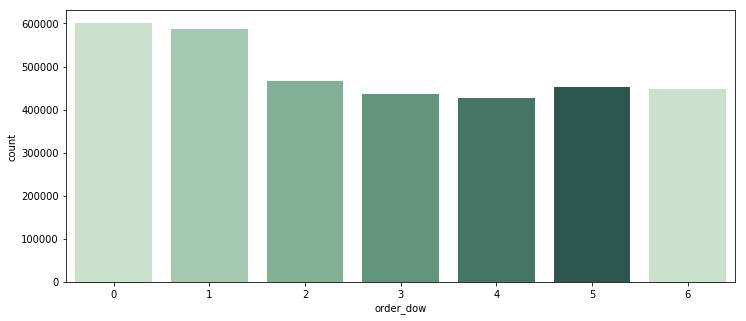

In [181]:
plt.figure(figsize=(12,5))
sns.countplot(x="order_dow", data=all_orders,palette = sns.color_palette("ch:2.5,-.2,dark=.3"))

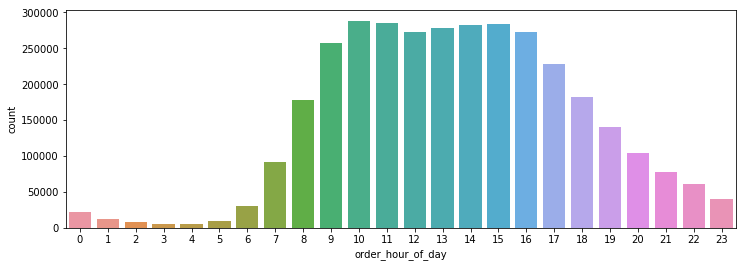

In [182]:
plt.figure(figsize=(12,4))
sns.countplot(x="order_hour_of_day", data=all_orders)

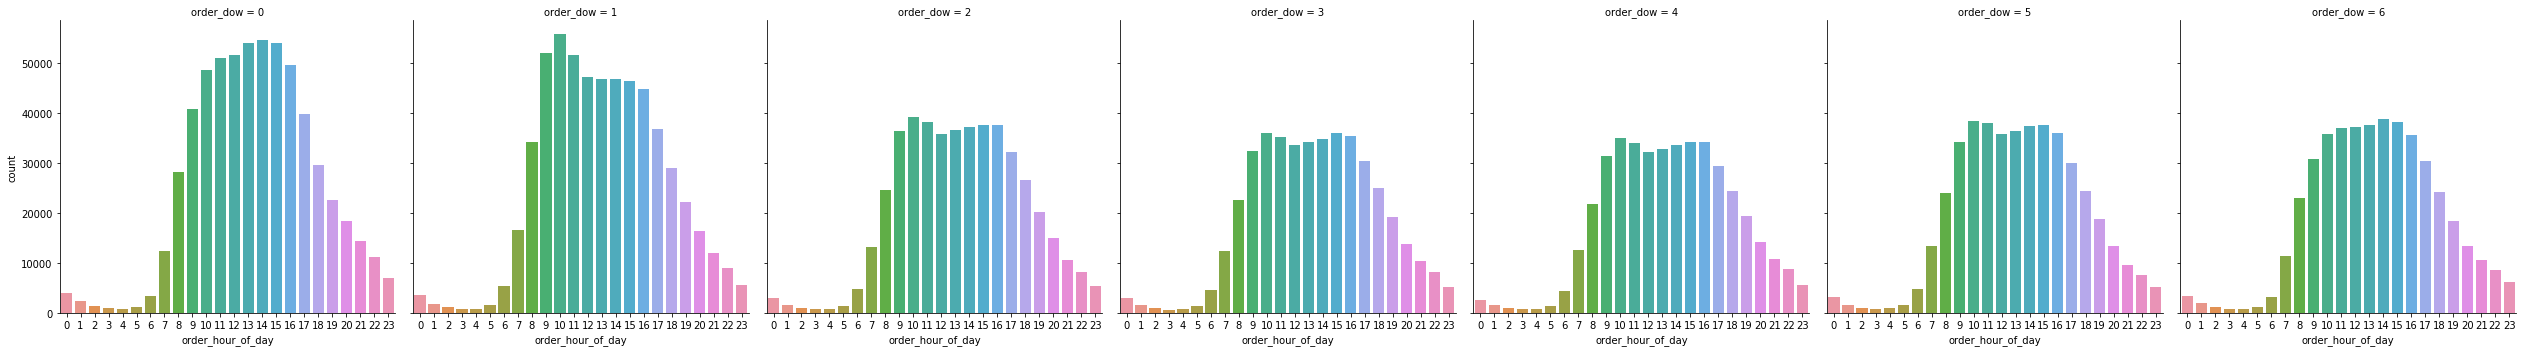

In [183]:
sns.catplot(x='order_hour_of_day',col="order_dow", data=all_orders,kind="count")

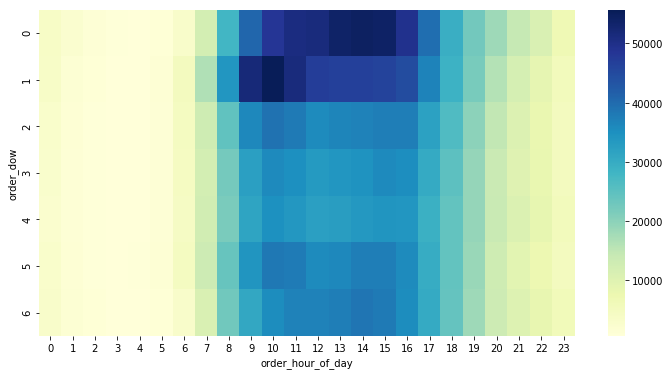

In [184]:
t = all_orders.groupby(['order_hour_of_day',"order_dow"])["order_id"].count().reset_index()
x = t.pivot("order_dow","order_hour_of_day","order_id")
plt.figure(figsize=(12,6))
sns.heatmap(x,cmap="YlGnBu")

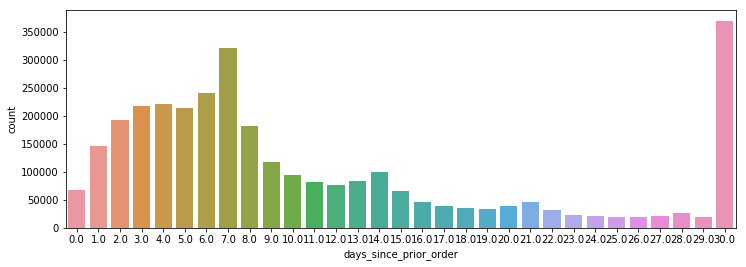

In [185]:
plt.figure(figsize=(12,4))
sns.countplot(x="days_since_prior_order", data=all_orders)

* Looks like days since prior order are capped at 30. What happens to users whose order frequency is less than once a month ? or people might be ordering once a month..since there are small peaks at 14 or 21 which is like a bi-weekly/ tri-weekly pattern // Deal with this
* Ordering once a week is the most common following once a month //Makes sense - a grocery store
* Most orders are between 8-9 am to 5-6 pm, possibly during work hours - looks like in pre-lunch and post-lunch - Maybe item wise hour of the day makes sense ? //Not sure if instacart delivers ready to eat stuff - Check
* There is a clear impact of day of week. 0,1 see more orders. But no info is given. Umm.. 0-1 weekend days. Rest all hour of the week distributions are similar, so maybe all weekdays or 0 can be assumed as sunday looking at total number of orders and their distributions by hour of the day. More orders on sunday to monday morning. But too many orders for a Monday. So maybe it is Sat & Sun. Can't say concretely. // Look at FAQ and validate if possible

### CUSTOMER BASKET STATS

Checking for where the first orders of users are present. Order number directly gives us this info. Although checking with NaNs of days since prior order and it can be seen that all first orders are in prior

In [186]:
first_orders = all_orders[all_orders.days_since_prior_order != all_orders.days_since_prior_order]
print(first_orders.shape)
print(first_orders.order_number.unique())
print(first_orders.eval_set.unique())
first_orders.head()

(206209, 7)
[1]
['prior']


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
11,2168274,2,prior,1,2,11,nan
26,1374495,3,prior,1,1,14,nan
39,3343014,4,prior,1,6,11,nan
45,2717275,5,prior,1,3,12,nan


In [187]:
print(prior_orders.columns) # Just for reference

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


Number of products bought in each order is a right tailed distribution. Peaks around 5-6 orders in prior orders and at 5 in train orders

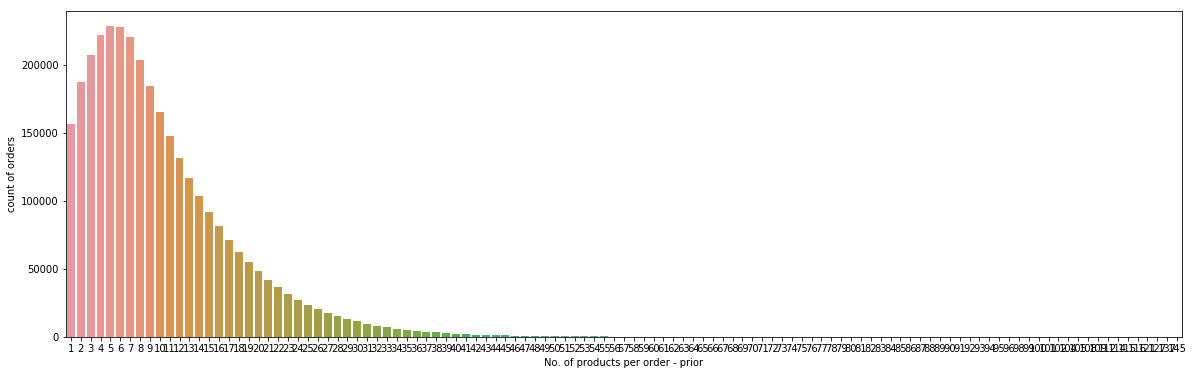

145


In [208]:
t = prior_orders.groupby('order_id')['product_id'].count().reset_index()
plt.figure(figsize=(20,6))
ax = sns.countplot(x='product_id',data=t)
ax.set(xlabel='No. of products per order - prior',ylabel='count of orders')
plt.show()
print(t['product_id'].max())

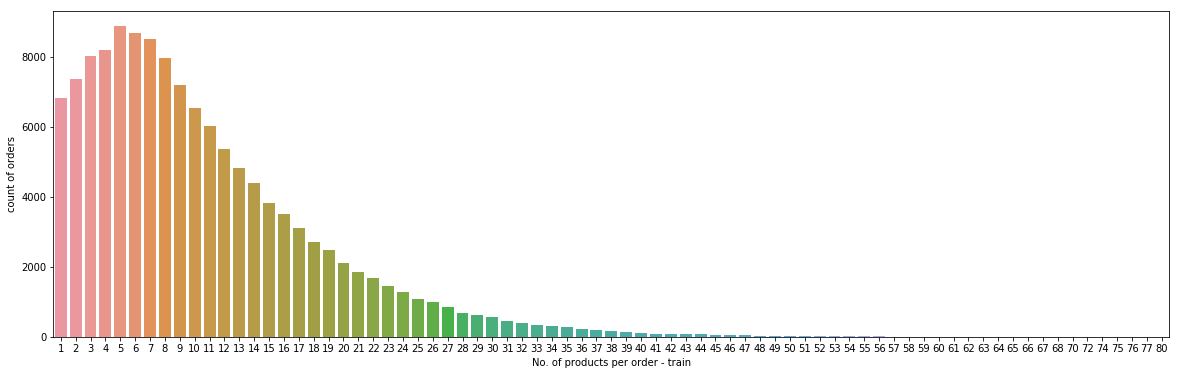

80


In [207]:
t = train_set.groupby('order_id')['product_id'].count().reset_index()
plt.figure(figsize=(20,6))
ax = sns.countplot(x='product_id',data=t)
ax.set(xlabel='No. of products per order - train',ylabel='count of orders')
plt.show()
print(t['product_id'].max())

Both prior and train data sets have ~60% re-ordered and ~40% non-repeat purchases of products overall. Pretty much balanced distribution of target variable

Reordered distribution in prior orders : 
 1   0.59
0   0.41
Name: reordered, dtype: float64
Reordered distribution in train orders : 
 1   0.60
0   0.40
Name: reordered, dtype: float64


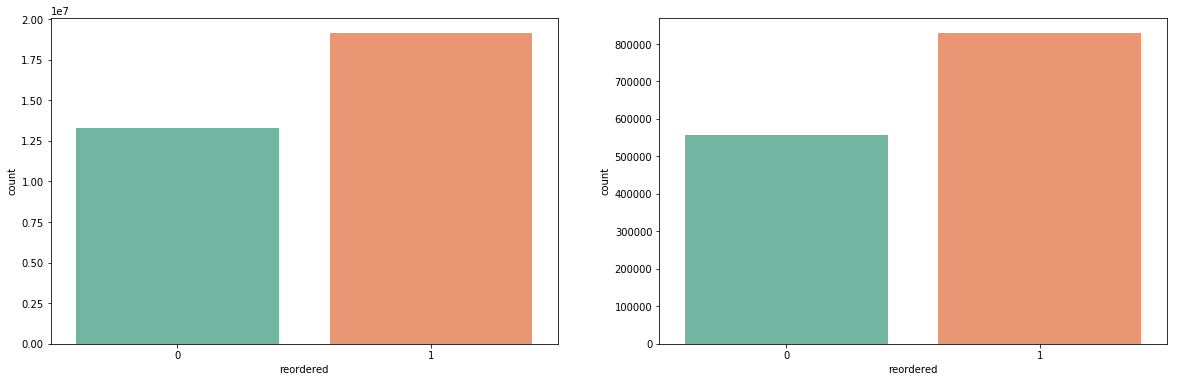

In [190]:
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
sns.countplot(x= 'reordered',data = prior_orders, ax=ax[0],palette = sns.color_palette("Set2"))
sns.countplot(x= 'reordered',data = train_set, ax=ax[1],palette = sns.color_palette("Set2"))
print("Reordered distribution in prior orders : \n",prior_orders.reordered.value_counts(normalize=True))
print("Reordered distribution in train orders : \n",train_set.reordered.value_counts(normalize=True))

We can see that a number of orders have no re-order products at all. 12% in prior set and 6.5% in training set. //Maybe the % of Nones against prediction should be around these values or other possibility is it is user specific.. But doesnt make sense,Why should anyone not re-order when they are customer with more than 4 orders ? so cant be customer specific.. Order/ Requirement specific


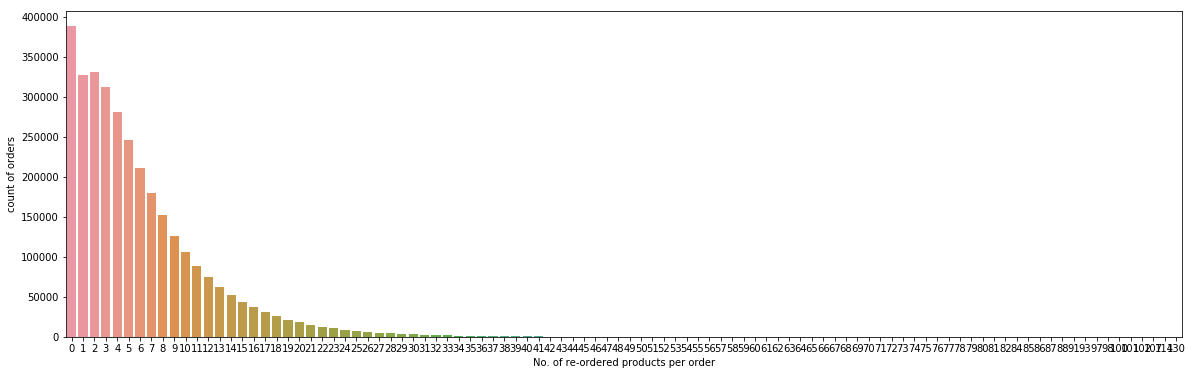

No. of orders with no reordered products in prior:  388513
% of orders with no reordered products in prior:  12.084859313304348


In [191]:
t = prior_orders.groupby('order_id')['reordered'].sum().reset_index()
plt.figure(figsize=(20,6))
#plt.xlabel('No. of re-ordered products per order')
#plt.ylabel('count of orders')
ax = sns.countplot(x='reordered',data=t)
ax.set(xlabel='No. of re-ordered products per order', ylabel='count of orders')
plt.show()
print("No. of orders with no reordered products in prior: ", t.loc[t['reordered'] == 0,'order_id'].size)
print("% of orders with no reordered products in prior: ",(t.loc[t['reordered'] == 0,'order_id'].size*100)/t['order_id'].size)

In [192]:
t = train_set.groupby('order_id')['reordered'].sum().reset_index()
print("No. of orders with no reordered products in train: ",t.loc[t['reordered'] == 0,'order_id'].size)
print("% of orders with no reordered products in train: ",(t.loc[t['reordered'] == 0,'order_id'].size*100)/t['order_id'].size)

No. of orders with no reordered products in train:  8602
% of orders with no reordered products in train:  6.555952716658156


### MAPPING THE RELATIONAL TABLES - OBSERVATIONS AGAINST TARGET VARIABLE

In [193]:
prior_orders_extended = prior_orders.merge(all_products[['product_id','aisle_id','department_id']], on='product_id', how='left').\
    merge(all_orders,on='order_id',how='left')
#    merge(all_aisles, on='aisle_id', how='left').\ # Removing as data too heavy \
#    merge(all_depts, on='department_id', how='left').\ # Removing as data too heavy \

prior_orders_extended.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,86,16,202279,prior,3,5,9,8.00
1,2,28985,2,1,83,4,202279,prior,3,5,9,8.00
2,2,9327,3,0,104,13,202279,prior,3,5,9,8.00
3,2,45918,4,1,19,13,202279,prior,3,5,9,8.00
4,2,30035,5,0,17,13,202279,prior,3,5,9,8.00


Incidentally the most ordered from departments also have the most reorder percentages which is produce, eggs and dairy, snacks and beverages. Unique Departments across orders also show the same trend. Nothing really comes out of the aisles graph this way, though its evident that it has an impact. Certain aisles clearly have higher number of orders, higher reorder rates. So this would be yet another feature to be considered.

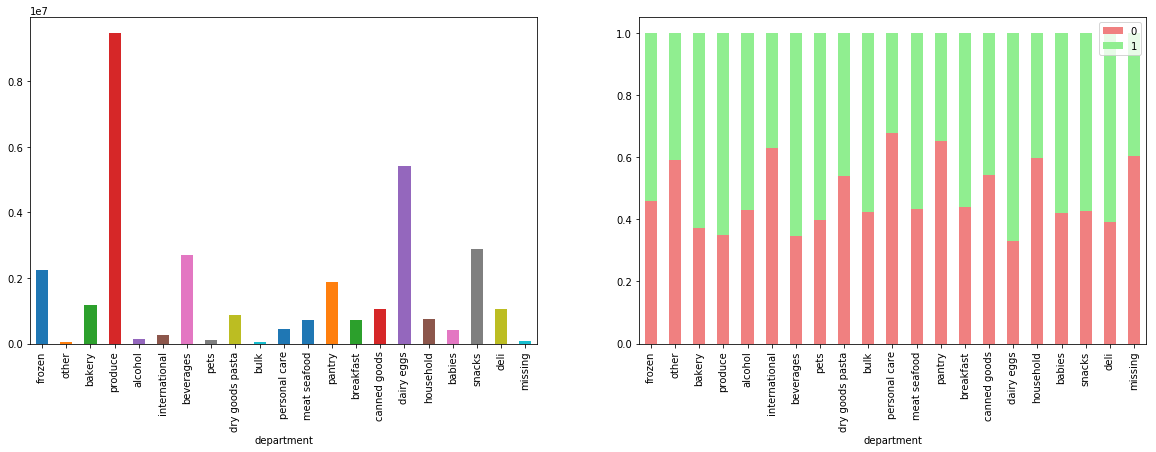

In [194]:
tab = pd.crosstab(prior_orders_extended['department_id'],prior_orders_extended['reordered'],values=prior_orders_extended['order_id'],aggfunc='count')
 # Mapping the names of dept here
tab = tab.merge(all_depts,how='left',left_index=True,right_on='department_id').drop('department_id',axis=1).set_index('department')
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
tab.sum(axis=1).plot(kind='bar',ax=ax[0])
tab_prop.plot(kind="bar", stacked=True, ax = ax[1],color = ['lightcoral','lightgreen'] )

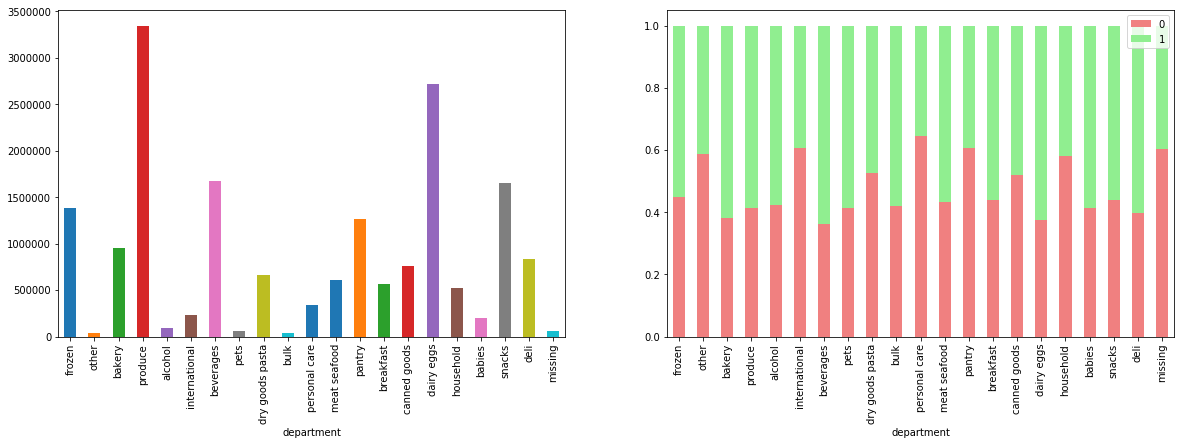

In [195]:
tab = pd.crosstab(prior_orders_extended['department_id'],prior_orders_extended['reordered'],values=prior_orders_extended['order_id'],aggfunc='nunique')
 # Mapping the names of dept here
tab = tab.merge(all_depts,how='left',left_index=True,right_on='department_id').drop('department_id',axis=1).set_index('department')
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
tab.sum(axis=1).plot(kind='bar',ax=ax[0])
tab_prop.plot(kind="bar", stacked=True, ax = ax[1],color = ['lightcoral','lightgreen'] )

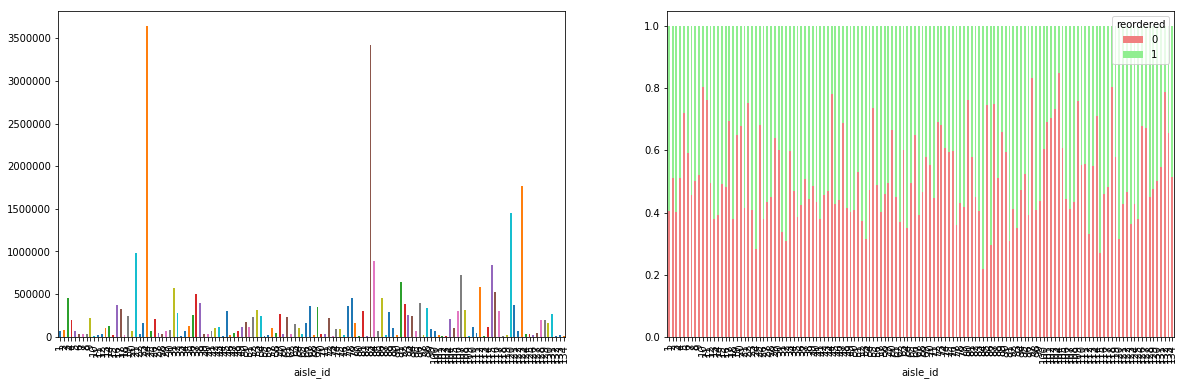

In [196]:
tab = pd.crosstab(prior_orders_extended['aisle_id'],prior_orders_extended['reordered'],values=prior_orders_extended['order_id'],aggfunc='count')
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
tab.sum(axis=1).plot(kind='bar',ax=ax[0])
tab_prop.plot(kind="bar", stacked=True, ax = ax[1],color = ['lightcoral','lightgreen'] )

Intuitively, there should be some products that are always reordered as such or mostly one time purchases. Next level would be looking at products that a given user always reorders. This would be an important feature to be considered to predict the target variable, but might result in sparse and biased data, given we are looking at users whose orders are as low as 3-4. So, right now, looking only at product stats irrespective of users. (Side note : Clustered users and product purchases can be considered - Park for later)

In [213]:
prod_repeatability = prior_orders_extended.groupby('product_id').agg(\
    {'add_to_cart_order':'mean','reordered':['count','sum']})
prod_repeatability.columns = prod_repeatability.columns.map('_'.join)
prod_repeatability = prod_repeatability.reset_index().rename(columns=\
    {'add_to_cart_order_mean':'avg_cart_position','reordered_count':'Total_Purchases','reordered_sum':'Repeat_Purchases'})
prod_repeatability['%_repeated'] = prod_repeatability['Repeat_Purchases']/prod_repeatability['Total_Purchases']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


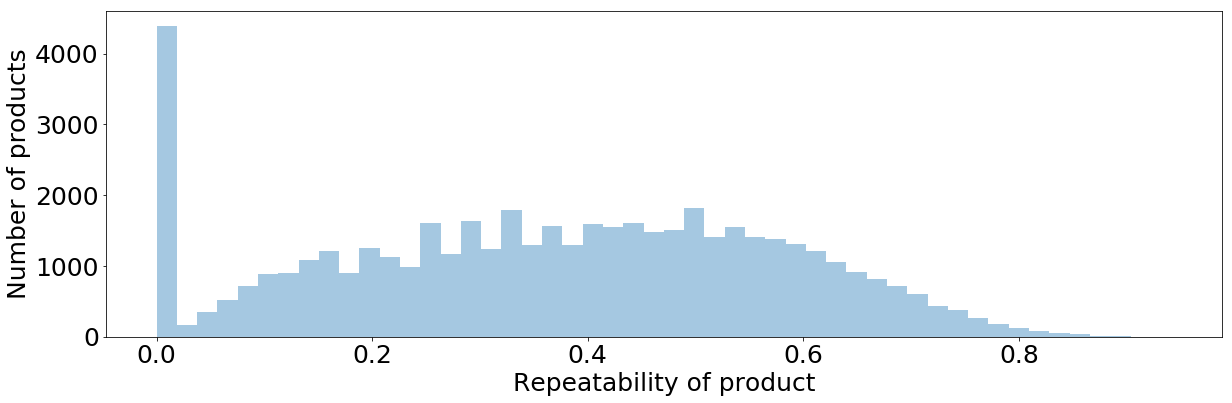

In [226]:
plt.figure(figsize=(20,6))
ax = sns.distplot(prod_repeatability['%_repeated'],kde=False)
ax.set(xlabel='Repeatability of product', ylabel='Number of products')
plt.show()


Order in which product is added to cart matters. Regular purchases are added quickly first and rest all later on. There is a steady decrease in the reorder rate as we go further down the cart order. The number of cart orders also die down post 50 (even earlier), so this would be a valid trend to consider. 

In [218]:
prod_cart_pos = prior_orders_extended.groupby('add_to_cart_order').agg({'reordered':['count','sum']}).reset_index()
prod_cart_pos.columns = prod_cart_pos.columns.map('_'.join)
prod_cart_pos = prod_cart_pos.reset_index().rename(columns=\
    {'reordered_count':'Total_Purchases','reordered_sum':'Repeat_Purchases'})
prod_cart_pos['%_repeated'] = prod_cart_pos['Repeat_Purchases']/prod_cart_pos['Total_Purchases']

In [220]:
prod_cart_pos.head()

,index,add_to_cart_order_,Total_Purchases,Repeat_Purchases,%_repeated
0,0,1,3214874,2178183,0.68
1,1,2,3058126,2068060,0.68
2,2,3,2871133,1889311,0.66
3,3,4,2664106,1696923,0.64
4,4,5,2442025,1507665,0.62


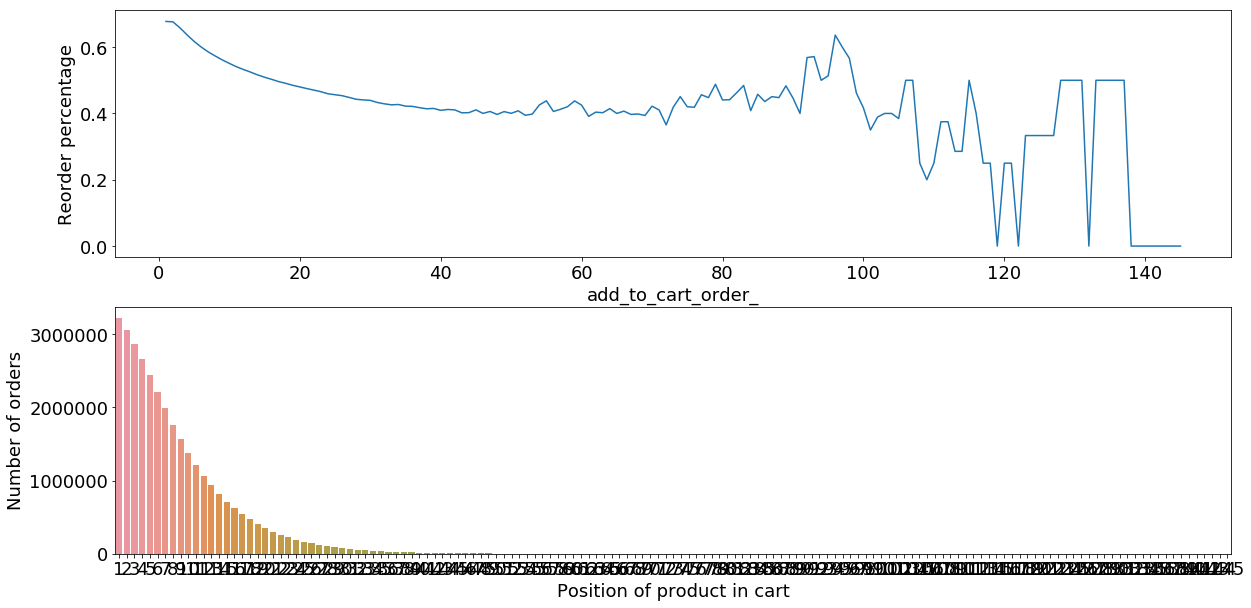

In [233]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
sns.lineplot(data =prod_cart_pos,x='add_to_cart_order_' ,y='%_repeated',ax=ax[0] )
ax[0].set(ylabel='Reorder percentage')
sns.barplot(data =prod_cart_pos,x='add_to_cart_order_' ,y='Total_Purchases',ax=ax[1])
ax[1].set(xlabel='Position of product in cart', ylabel='Number of orders')
plt.show()

### QUALITATIVE LOOK AT THE PRODUCTS (PURELY FOR EDA)

#### MOST ORDERED PRODUCTS

In [199]:
product_frequency = prior_orders_extended.groupby('product_id').agg({'order_id':'count','reordered':'sum'})
product_frequency = product_frequency.reset_index().rename(columns={'order_id':'Total_Orders','reordered':'No_reorders'})
product_frequency = product_frequency.merge(all_products,how='left',on='product_id').\
    merge(all_aisles,how='left',on='aisle_id').\
    merge(all_depts,how='left',on='department_id')
product_frequency['reorder_%'] = product_frequency['No_reorders']/product_frequency['Total_Orders']

In [200]:
product_frequency.sort_values(by=['Total_Orders','reorder_%'],ascending=False).head(15)

,product_id,Total_Orders,No_reorders,product_name,aisle_id,department_id,aisle,department,reorder_%
24848,24852,472565,398609,Banana,24,4,fresh fruits,produce,0.84
13172,13176,379450,315913,Bag of Organic Bananas,24,4,fresh fruits,produce,0.83
21133,21137,264683,205845,Organic Strawberries,24,4,fresh fruits,produce,0.78
21899,21903,241921,186884,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,0.77
47198,47209,213584,170131,Organic Hass Avocado,24,4,fresh fruits,produce,0.80
47755,47766,176815,134044,Organic Avocado,24,4,fresh fruits,produce,0.76
47615,47626,152657,106255,Large Lemon,24,4,fresh fruits,produce,0.70
16793,16797,142951,99802,Strawberries,24,4,fresh fruits,produce,0.70
26204,26209,140627,95768,Limes,24,4,fresh fruits,produce,0.68
27839,27845,137905,114510,Organic Whole Milk,84,16,milk,dairy eggs,0.83


Top ordered products are from produce and mostly fresh fruits isles (which can be expected as perishables are supposed to have higher order frequency). The department tallies with what we have observed earlier. Top products also have very high reorder percentages. Limes, blueberries are slightly lagging here, but the cause can very likely be seasonality.

Organic seems to be the most popular catch

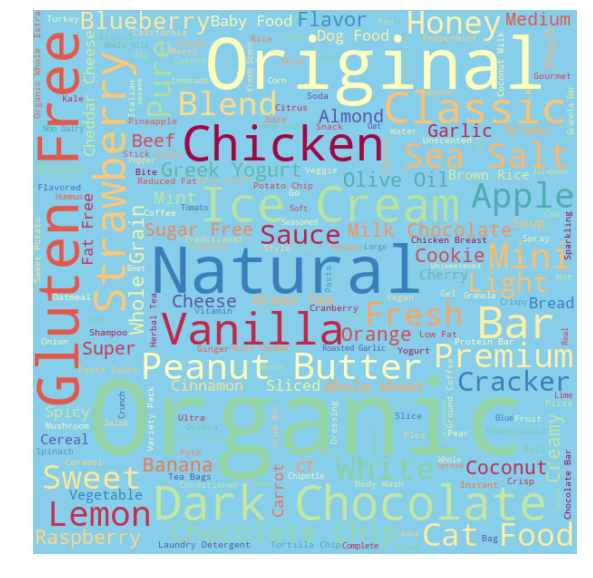

In [201]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600,background_color="skyblue",colormap="Spectral").generate(' '.join(product_frequency['product_name']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### TOP AISLES

In [202]:
aisle_frequency = product_frequency.groupby(['department_id','aisle_id'])['Total_Orders','No_reorders'].sum().reset_index()
aisle_frequency = aisle_frequency.merge(all_aisles,how='left',on='aisle_id').\
    merge(all_depts,how='left',on='department_id')
aisle_frequency['reorder_%'] = aisle_frequency['No_reorders']/aisle_frequency['Total_Orders']

In [203]:
aisle_frequency.sort_values(by=['Total_Orders','reorder_%'],ascending=False).head(10)

,department_id,aisle_id,Total_Orders,No_reorders,aisle,department,reorder_%
18,4,24,3642188,2615469,fresh fruits,produce,0.72
20,4,83,3418021,2032172,fresh vegetables,produce,0.59
21,4,123,1765313,1127177,packaged vegetables fruits,produce,0.64
102,16,120,1452343,997018,yogurt,dairy eggs,0.69
94,16,21,979763,573383,packaged cheese,dairy eggs,0.59
98,16,84,891015,696264,milk,dairy eggs,0.78
38,7,115,841533,613977,water seltzer sparkling water,beverages,0.73
125,19,107,722470,425387,chips pretzels,snacks,0.59
100,16,91,638253,442023,soy lactosefree,dairy eggs,0.69
15,3,112,584834,391937,bread,bakery,0.67


Top aisles stay of fruits, vegetables and milk

#### TOP DEPARTMENTS

Department behaviour has been discussed earlier. Putting it up in a different format, we can see how produce occupies a major share.

In [204]:
department_frequency = product_frequency.groupby(['department_id'])['Total_Orders','No_reorders'].sum().reset_index()
department_frequency = department_frequency.merge(all_depts,how='left',on='department_id')

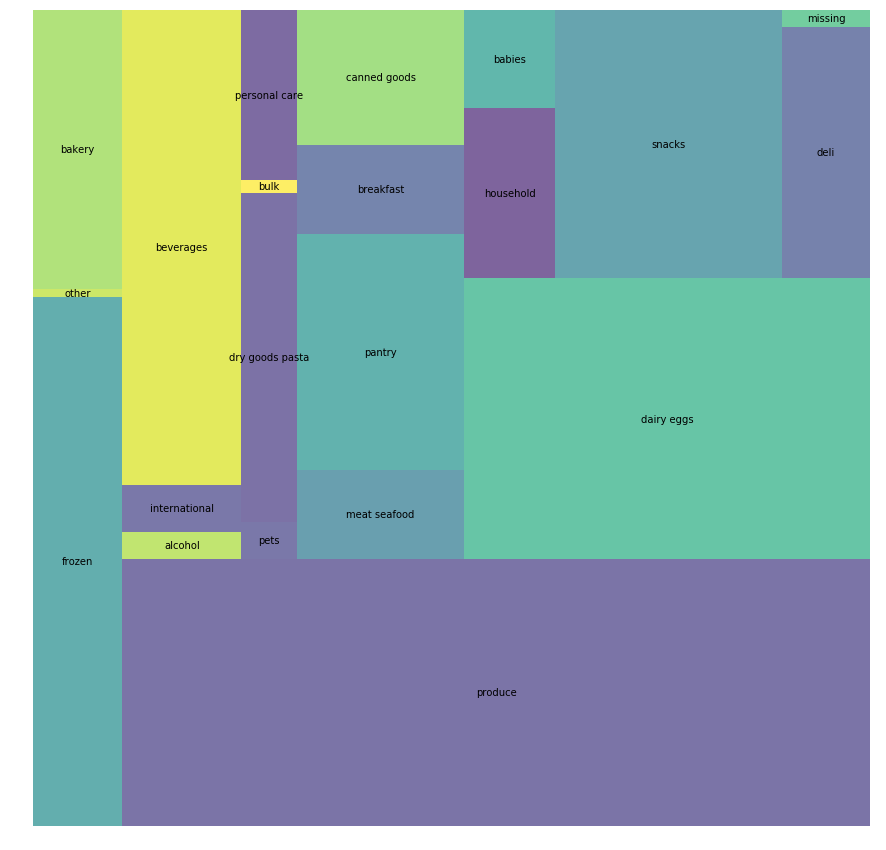

In [205]:
import squarify
plt.figure(figsize=(15,15))
squarify.plot(sizes=department_frequency['Total_Orders'], label=department_frequency['department'], alpha=.7 )
plt.axis('off')
plt.show()